In [1]:
from vqvae import VQVAE
from utils import *


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.nn import functional as F

import numpy as np

# Visuals utils
import os
import matplotlib.pyplot as plt
from tqdm import tqdm


In [3]:

# detect gpu ?

print(torch.cuda.is_available())

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


True
cuda:0


In [4]:
# 1. Load and Preprocess the Dataset
transform = transforms.Compose([
    transforms.ToTensor(),               # Convert images to PyTorch tensors
    # transforms.Normalize((0.5,), (0.5,)) # Normalize the images to [-1, 1]
])

# Download and load the Fashion-MNIST training and test dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)

TrainLoader = DataLoader(train_dataset, batch_size=32, shuffle=True)
TestLoader  = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Class labels for reference
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
K =  128 # size of the CodeBook
D =  32 # dimension of each embedding vector
in_channels = 1 # gray scale image  = 1 color channel
downsampling_factor = 4 # two stages of dwonsampling the image (28x28) --> (7x7) 

----------
### Call trained models

In [13]:
model_path = 'saved_models/model_101.pth'

model = VQVAE(in_channels, D, K, downsampling_factor=4)
model.load_state_dict(torch.load(model_path)['model_state_dict'])
model = model.to(device)

/tmp/ipykernel_966675/1935159300.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path)['model_state_dict'])


In [ ]:
hist = codebook_hist_testset(model, TestLoader)

 ONLY 63 OF CODES WERE USED FROM 128, WHICH MAKE 49.21875 % OF CODES FROM THE CODE-BOOK


Text(0.5, 1.0, 'Histogram of used codes during one pass through test-set')

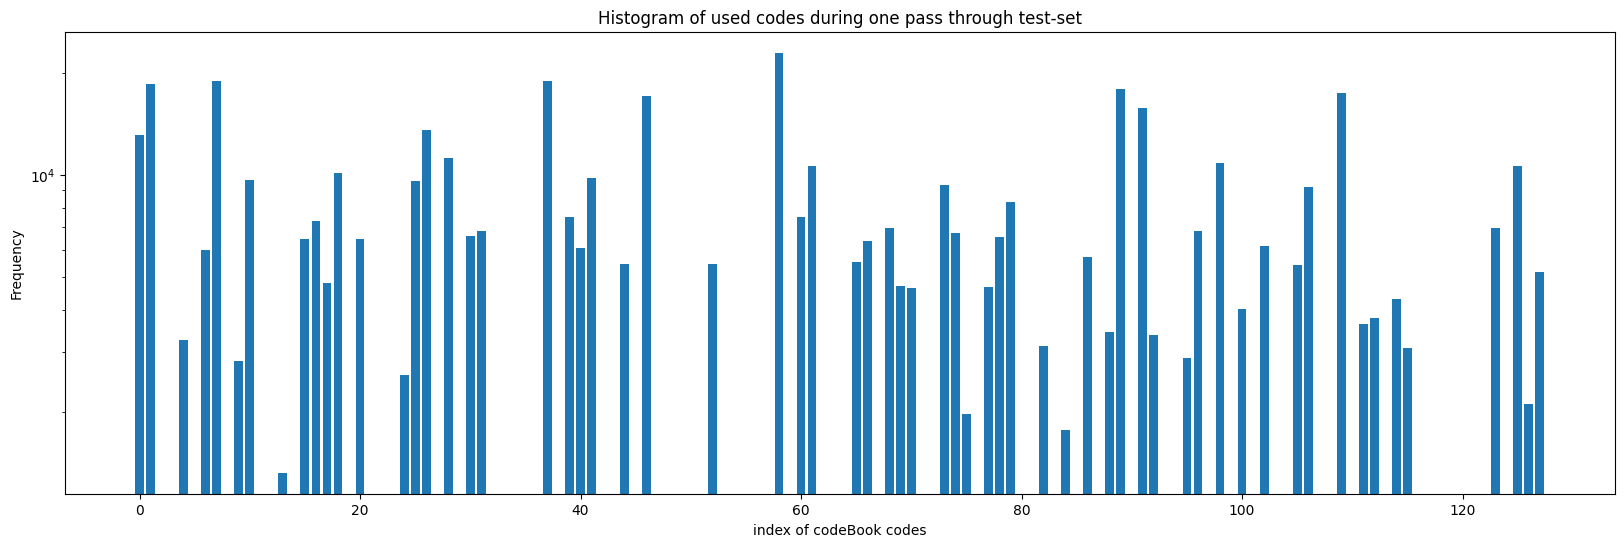

In [17]:
plt.figure(figsize=(20, 6))
plt.bar(range(len(hist)), hist)
plt.yscale('log')

plt.xlabel('index of codeBook codes')        # Label for the x-axis
plt.ylabel('Frequency')    # Label for the y-axis
plt.title('Histogram of used codes during one pass through test-set')  # Title

>> WE notice a big amount of codes weren't used in the training process, this phenomenon is called **Dead Codes**, to prevent this many methods of fine-tuning or projections are proposed in the sttae of the art, I will implement the Re-Fit method proposed in the article : "link" in the next jupyter.